# Machine Learning, Module 1
## **Linear Regression**
All you need to know

In [1]:
#Set the width of teh notebook
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:90% !important; }</style>"))

## <span style="color:red">**Linear Regression includes polynomial equations as well**
Linear term referes to $w$ (coefficients) </span>
### **polynomial:**$$ y = w_0 + w_1.X + w_2.X^2 + ... $$

### **multiclass:** $$ y = w_0 + w_1.X_1 + w_2.X_2 + ... $$


In [2]:
import pandas as pd
import numpy as np
import mglearn
import matplotlib.pyplot as plt 
from sklearn.model_selection import train_test_split

C:\Users\Behnam\Anaconda3\lib\site-packages\sklearn\externals\six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)
C:\Users\Behnam\Anaconda3\lib\site-packages\sklearn\externals\joblib\__init__.py:15: FutureWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=FutureWarning)


In [3]:
#Don't use scientific numbers
np.set_printoptions(suppress=True)

### The first time we instal mglearn library

    !pip --version 
*get the current pip version*
 
     !py -3.7 -m pip install mglearn 
     
*install the package in the current pip version*
    
#### or: 

    !pip install mglearn
    
> mglearn is a library by O'Reilly 


# Loaing wave dataset, with only one feature

In [4]:
plt.style.use('classic')

w[0]: 0.393906  b: -0.031804


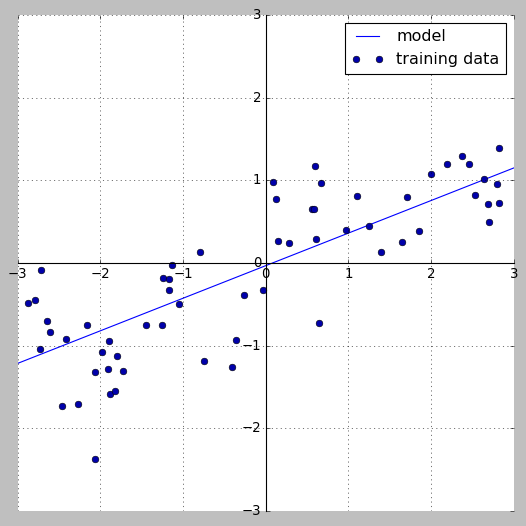

In [5]:
mglearn.plots.plot_linear_regression_wave()

#This dataset is inside maglearn library

# **Single Linear Regression**

We only have one feature(column) which is the independent variable(x)

In [6]:
from sklearn import linear_model
X, y = mglearn.datasets.make_wave(n_samples=60)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)


## **Ordinary Least Squares**

more info:  https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html

In [7]:
regOrdinary = linear_model.LinearRegression().fit(X_train, y_train)

#Ordinary Least Squares

In [8]:
print("regOrdinary.coef_:", regOrdinary.coef_)
print("regOrdinary.intercept_:", regOrdinary.intercept_)


regOrdinary.coef_: [0.39390555]
regOrdinary.intercept_: -0.031804343026759746


### We only have one single independant feature in the wave dataset

So the coefiecient is only one number

### **NOTE**
You might notice the strange-looking trailing underscore at the end of coef_ and
intercept_. scikit-learn always stores anything that is derived from the
training data in attributes that end with a trailing underscore. That is to separate
them from parameters that are set by the user.

## **score:**

    score(X_test, y_test)
Return the coefficient of determination $R^2$ of the prediction.

$$R^2 = 1- \frac{\sum_{i=o}^m (y_t - y_p) ^ 2}{\sum_{i=0}^m (y_t - \overline y_t )^ 2}$$

$m:$ number of data(rows)

$y_t$ = actual value

$ \overline y_t:$ average of $y_t$ values

$y_p$: predicted value


>The best possible score is 1.0 

In [9]:
print("Training set score: {:.2f}".format(regOrdinary.score(X_train, y_train)))
print("Test set score: {:.2f}".format(regOrdinary.score(X_test, y_test)))

Training set score: 0.67
Test set score: 0.66


Score around 0.66 is not very good, but we can see that the
scores on the training and test sets are very close together. This
means we are likely underfitting, not overfitting. 

For this onedimensional
dataset, there is little danger of overfitting, as the model
is very simple (or restricted).

# **Multiple Linear Regression**

## Loading Boston Housing dataset 

- 506 samples and 105 features

In [10]:
from sklearn.datasets import load_boston
boston = load_boston()
print("Data shape:", boston.data.shape)
#This dataset is inside maglearn library

Data shape: (506, 13)


In [11]:
type(boston)
#Boston in a Bunch object

sklearn.utils.Bunch

#### Converting the Bunch object into a DataFrame

In [12]:
df_boston = pd.DataFrame(boston.data, columns=boston.feature_names)
df_boston['MedianPrice'] = pd.Series(boston.target)
df_boston

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MedianPrice
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48,22.0


In [13]:
cols = df_boston.columns.tolist()
cols = cols[-1:] + cols[:-1]
df_boston = df_boston[cols]
df_boston
#Rearranging columns in a way that target column be the first column

,MedianPrice,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,24.0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,21.6,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,34.7,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,33.4,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,36.2,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,22.4,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67
502,20.6,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08
503,23.9,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64
504,22.0,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48


### Multiple regression with 13 features(columns)

In [14]:
target = 'MedianPrice' 
predictors = df_boston.columns[1:]

In [15]:
y = df_boston[target]
X = df_boston[predictors]

### <span style="color:red">**Stratify** </span>


#### Stratify makes sure that the distribution remains consistant in training and test set 
- Balance of classes remain the same

- Always set `stratify = y`

In [16]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

In [17]:
lr = linear_model.LinearRegression().fit(X_train, y_train)

In [18]:
print("Training set score: {:.2f}".format(lr.score(X_train, y_train)))
print("Test set score: {:.2f}".format(lr.score(X_test, y_test)))

Training set score: 0.77
Test set score: 0.64


### Working with bunch object directly

In [19]:
from sklearn.linear_model import LinearRegression
X, y = mglearn.datasets.load_extended_boston()

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
lr = LinearRegression().fit(X_train, y_train)
print(f"Training set score: {lr.score(X_train, y_train):.2f}")
print(f"Test set score: {lr.score(X_test, y_test):.2f}")

Training set score: 0.95
Test set score: 0.61


This discrepancy between performance on the training set and the
test set is a clear sign of overfitting, and therefore we should try to
find a model that allows us to control complexity.

In [20]:
from IPython.display import Image
from IPython.core.display import HTML 
Image(url= "https://ars.els-cdn.com/content/image/1-s2.0-S0378778819316585-gr3.jpg")


### *Overfitting* 
Overfitting occurs when you fit a model too closely to the training set and obtain a model that works well on the training set but is not able to generalize to new data.
>High score in train but low score on test

>Model is too complex

### *underfitting*
If your model is too simple then it might not be able to capture all the aspects of and variability in the data, and your model will do badly even on the training set. Choosing too simple a model is called underfitting.
>Low score on training

>Model is too simple

# **Ridge regression** ($l_2$ regularization)
$$ L = {\sum_{i=o}^m (y_t - y_p) ^ 2} +  \lambda \sum_{j=o}^p { w_j^2} $$


$$ y_p = b + \sum_{j=o}^p w_j.x_i $$


$$ L = {\sum_{i=o}^m (y_t - (b + \sum_{j=o}^p w_j.x_i)) ^ 2} +  \lambda \sum_{j=o}^p {w_j^2} $$



<span style="color:red">**$ \lambda :$ Regularization Term (hyper Parameter)** </span>
 
$m:$ number of data points(rows)

$p:$ mumber of features(columns)

$y_t$ = actual value

$y_p$: predicted value

>In order to minimize $L$ fuction, $w$ should be small. It means that weight of each column leans toward zero


more info: https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Ridge.html


### **Regularization:** 
### each feature should have as little effect on the outcome as possible 
- which translates to having a
small slope , while still predicting well. This constraint is an example
of what is called regularization.
- Regularization means explicitly
restricting a model to avoid overfitting.
- The particular kind used by
ridge regression is known as L2 regularization

In [21]:
from sklearn.linear_model import Ridge
ridge = Ridge().fit(X_train, y_train)
print(f"Training set score: {ridge.score(X_train, y_train): 0.2f}" )
print(f"Test set score: {ridge.score(X_test, y_test):.2f}" )

Training set score:  0.89
Test set score: 0.75


### **Generalization:**
As you can see, the training set score of Ridge is lower than for
LinearRegression, while the test set score is higher. This is
consistent with our expectation. With linear regression, we were
overfitting our data. Ridge is a more restricted model, so we are less
likely to overfit. A less complex model means worse performance on
the training set, but better generalization. As we are only interested
in generalization performance, we should choose the Ridge model
over the LinearRegression model.

### **alpha parameter:**
How much importance the model places on simplicity 

>default
parameter alpha=1.0



In [22]:
ridge10 = Ridge(alpha=10).fit(X_train, y_train)
print(f"Training set score: {ridge10.score(X_train, y_train):.2f}")
print(f"Test set score: {ridge10.score(X_test, y_test):.2f}")

Training set score: 0.79
Test set score: 0.64


In [23]:
ridge01 = Ridge(.1).fit(X_train, y_train)
print(f"Training set score: {ridge01.score(X_train, y_train):.2f}")
print(f"Test set score: {ridge01.score(X_test, y_test):.2f}")

Training set score: 0.93
Test set score: 0.77


### Increasing alpha 
forces coefficients
to move more toward zero, which decreases training set
performance but might help generalization
> $w \rightarrow 0$ (toward simplicity)

>Restriced model

> Underfitting danger

### Decreasing alpha 
allows the coefficients to be less restricted. For very small values of alpha,
coefficients are barely restricted at all, and we end up with a model
that resembles LinearRegression
> model $\rightarrow$ Ordinary Linear Regression (less simplicity)

>Complex model 

>Overfitting danger

In [24]:
import matplotlib.pyplot as plt 

In [25]:
plt.style.use('dark_background')

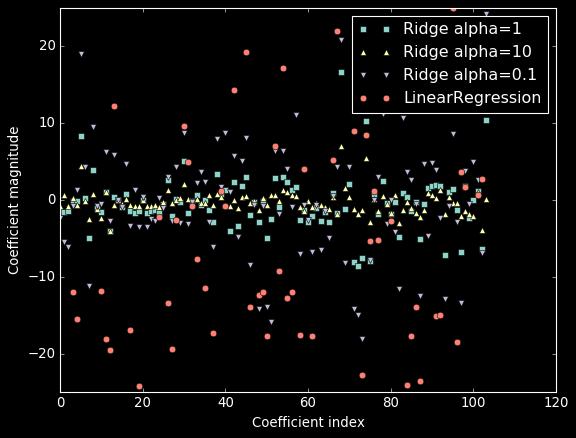

In [26]:
plt.plot(ridge.coef_, 's', label="Ridge alpha=1")
plt.plot(ridge10.coef_, '^', label="Ridge alpha=10")
plt.plot(ridge01.coef_, 'v', label="Ridge alpha=0.1")
plt.plot(lr.coef_, 'o', label="LinearRegression")
plt.xlabel("Coefficient index")
plt.ylabel("Coefficient magnitude")
plt.hlines(0, 0, len(lr.coef_))
plt.ylim(-25, 25)
plt.legend()

## This Plot shows:
>### Linear Regression 
has the most scattered values for coefficient $(w)$

>### Ridge
with higher alpha value has the the least scattered coeficient $(w)$

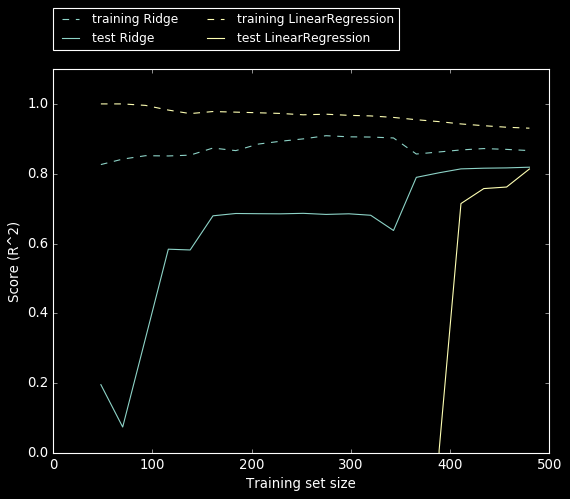

In [27]:
mglearn.plots.plot_ridge_n_samples()

## This plot shows:
> ### Score is always better for training than testing

>### Training:
with more data *training* score goes down beacuse it's harder to fit more data

>### When yo don't have enough data:
> Regularization is very helpful (Ridge score is better than Linear Regression)

# **Lasso**  ($l_1$ Regularization)

$$ L = {\sum_{i=o}^m (y_t - y_p) ^ 2} +  \lambda \sum_{j=o}^p {| w_j|} $$


$$ y_p = b + \sum_{j=o}^p w_j.x_i $$


$$ L = {\sum_{i=o}^m (y_t - (b + \sum_{j=o}^p w_j.x_i)) ^ 2} +  \lambda \sum_{j=o}^p {| w_j|} $$

<span style="color:red">**$ \lambda :$ Regularization Term (hyper Parameter)** </span>
 
$m:$ number of data points(rows)

$p:$ mumber of features(columns)

$y_t$ = actual value

$y_p$: predicted value

> In order to minimize $L$ fuction, $w$ should be small. It means that wight of each column leans toward zero

more info: https://scikitlearn.org/stable/modules/generated/sklearn.linear_model.Lasso.html#sklearn.linear_model.Lasso

Using the lasso also restricts coefficients to be
close to zero, but in a slightly different way.
The consequence of L1 regularization is that when using the lasso,
some coefficients are exactly zero.

In [28]:
from sklearn.linear_model import Lasso
lasso = Lasso().fit(X_train, y_train)
print(f"Training set score: {lasso.score(X_train, y_train):.2f}")
print(f"Test set score: {lasso.score(X_test, y_test):.2f}")
print("Number of features used: {}".format(np.sum(lasso.coef_ != 0)))

Training set score: 0.29
Test set score: 0.21
Number of features used: 4


Lasso does quite badly, both on the training and the
test set. This indicates that we are underfitting, and we find that it
used only 4 of the 105 features
> Underfitted

# $alpha:$
Alpha controls how strongly coefficients are pushed toward zero..

>default alpha=1.0 (For alpha=1 most of the coefficients are zero)

>alpha = 0 is equivalent to an ordinary least square

To reduce underfitting, let’s try
decreasing alpha. When we do this, we also need to increase the
default setting of max_iter (the maximum number of iterations to
run):

In [29]:
# we increase the default setting of "max_iter",
# otherwise the model would warn us that we should increase max_iter.
lasso001 = Lasso(alpha=0.01, max_iter=100000).fit(X_train, y_train)
print(f"Training set score: {lasso001.score(X_train, y_train):.2f}")
print(f"Test set score: {lasso001.score(X_test, y_test):.2f}")
print("Number of features used: {}".format(np.sum(lasso001.coef_ != 0)))

Training set score: 0.90
Test set score: 0.77
Number of features used: 33


In [30]:
lasso00001 = Lasso(alpha=0.0001, max_iter=100000).fit(X_train, y_train)
print(f"Training set score: {lasso00001.score(X_train, y_train):.2f}")
print(f"Test set score: {lasso00001.score(X_test, y_test):.2f}")
print("Number of features used: {}".format(np.sum(lasso00001.coef_ != 0)))

Training set score: 0.95
Test set score: 0.64
Number of features used: 96


### Lowering alpha:
    
- Train score is increased
    
- Test score is decreased
    
- more column is used, more complicated model which worked
better on the training  data

>regularization effect removed

> result similar to
LinearRegression
    
>Overfitted 

Text(0, 0.5, 'Coefficient magnitude')

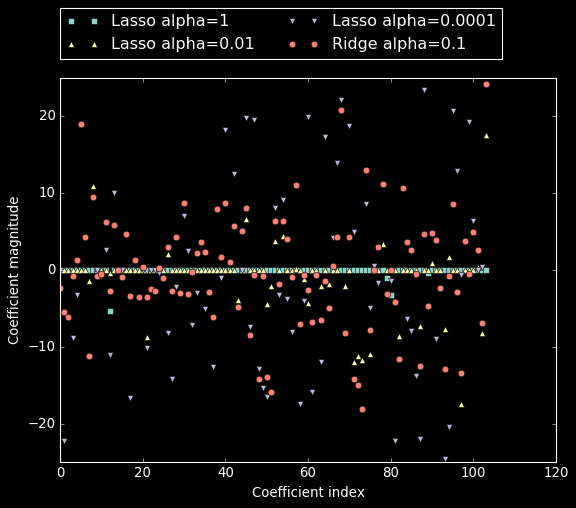

In [31]:
plt.plot(lasso.coef_, 's', label="Lasso alpha=1")
plt.plot(lasso001.coef_, '^', label="Lasso alpha=0.01")
plt.plot(lasso00001.coef_, 'v', label="Lasso alpha=0.0001")
plt.plot(ridge01.coef_, 'o', label="Ridge alpha=0.1")
plt.legend(ncol=2, loc=(0, 1.05))
plt.ylim(-25, 25)
plt.xlabel("Coefficient index")
plt.ylabel("Coefficient magnitude")

For alpha=1, we not only see that most of the coefficients are zero
(which we already knew), but that the remaining coefficients are also
small in magnitude. Decreasing alpha to 0.01, we obtain the solution
shown as the blue dots, which causes most features to be exactly
zero. Using alpha=0.00001, we get a model that is quite
unregularized, with most coefficients nonzero and of large
magnitude

# $\alpha$ and $w$ (coefficient)
###  are reversly related

# **ElasticNet**

>which combines the penalties of Lasso and Ridge.

- alpha: Regularization strength; must be a positive float.

- $l_1$ ratio is between 0 and 1, the penalty is a combination of $l_1$ and $l_2$.

more info: https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Ridge.html

In [32]:
 from sklearn.linear_model import ElasticNet

In [33]:
elastic = ElasticNet(alpha=0.001, max_iter=100000, l1_ratio = 0.8 ).fit(X_train, y_train)
print(f"Training set score: {elastic.score(X_train, y_train):.2f}")
print(f"Test set score: {elastic.score(X_test, y_test):.2f}")

Training set score: 0.93
Test set score: 0.78


# More examples


## Single Linear Regression

Average temprature in New York city for month January 1895-2018


In [34]:
df_nyc = pd.read_csv(r'C:\Users\Behnam\Downloads\Python\Datasets\ave_hi_nyc_jan_1895-2018.csv')
df_nyc

,Date,Value,Anomaly
0,189501,34.2,-3.2
1,189601,34.7,-2.7
2,189701,35.5,-1.9
3,189801,39.6,2.2
4,189901,36.4,-1.0
...,...,...,...
119,201401,35.5,-1.9
120,201501,36.1,-1.3
121,201601,40.8,3.4
122,201701,42.8,5.4


In [35]:
df_nyc.dtypes

Date         int64
Value      float64
Anomaly    float64
dtype: object

In [36]:
df_nyc['Date'] = pd.to_datetime(df_nyc['Date'].astype(str), format='%Y%m')

#changing format of 'yyyymm' to '%Y%m'

In [37]:
df_nyc['Date'] = df_nyc['Date'].dt.year
df_nyc
#Extractng the year from 'Date' columnn

,Date,Value,Anomaly
0,1895,34.2,-3.2
1,1896,34.7,-2.7
2,1897,35.5,-1.9
3,1898,39.6,2.2
4,1899,36.4,-1.0
...,...,...,...
119,2014,35.5,-1.9
120,2015,36.1,-1.3
121,2016,40.8,3.4
122,2017,42.8,5.4


In [38]:
df_nyc.drop('Anomaly', axis =1,  inplace = True)
df_nyc


,Date,Value
0,1895,34.2
1,1896,34.7
2,1897,35.5
3,1898,39.6
4,1899,36.4
...,...,...
119,2014,35.5
120,2015,36.1
121,2016,40.8
122,2017,42.8


In [39]:
df_nyc.rename( columns = {'Value':'Temperature'}, inplace = True)
df_nyc= df_nyc[['Temperature', 'Date' ]]
df_nyc

#We always want to place the target column a sthe first column

,Temperature,Date
0,34.2,1895
1,34.7,1896
2,35.5,1897
3,39.6,1898
4,36.4,1899
...,...,...
119,35.5,2014
120,36.1,2015
121,40.8,2016
122,42.8,2017


 ### We can use this code
     X_train, X_test, y_train, y_test = train_test_split(
             nyc.Date.values.reshape(-1, 1), nyc.Temperature.values, 
             random_state=11)
             
 reshape(-1, 1) changes the 1 dimentional array into 2D whish is neccesary for training the model

### Or we can use this regular approach:

In [40]:
df_nyc

,Temperature,Date
0,34.2,1895
1,34.7,1896
2,35.5,1897
3,39.6,1898
4,36.4,1899
...,...,...
119,35.5,2014
120,36.1,2015
121,40.8,2016
122,42.8,2017


In [41]:
target ='Temperature'
predictator = df_nyc.columns[1:]

In [42]:
y = df_nyc[target]
X = df_nyc[predictator]

In [43]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=.3, random_state=5)

In [44]:
from sklearn import linear_model

In [45]:
lr = linear_model.LinearRegression()

In [46]:
lr.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [47]:
print("regOrdinary.coef_:", lr.coef_)
print("regOrdinary.intercept_:", lr.intercept_)

regOrdinary.coef_: [0.01216738]
regOrdinary.intercept_: 13.718514583112633


In [48]:
print(f"Training set score: {regOrdinary.score(X_train, y_train):.2f}")
print(f"Test set score: {regOrdinary.score(X_test, y_test):.2f}")

Training set score: -27195.85
Test set score: -24514.90


In [49]:
predicted = lr.predict(X_test)
predicted

array([37.46924543, 37.4935802 , 37.88293644, 38.00461027, 36.98255013,
       37.28673469, 37.84643429, 37.29890207, 37.22589778, 36.89737845,
       38.07761456, 37.50574758, 37.11639134, 38.18712101, 37.76126261,
       37.55441711, 36.84870892, 38.06544718, 37.85860167, 37.20156301,
       37.05555442, 37.01905227, 37.38407375, 37.93160597, 38.27229268,
       37.37190637, 37.25023254, 37.40840852, 38.17495362, 37.32323684,
       37.35973899, 38.23579054, 37.04338704, 37.45707805, 37.78559738,
       37.65175617, 37.43274328, 38.0532798 ])

In [50]:
expected = y_test

In [51]:
for p, e in zip(predicted, expected):
     print(f'predicted: {p:.2f}, expected: {e:.2f}')
        
#print all predicted and expected values

predicted: 37.47, expected: 42.40
predicted: 37.49, expected: 37.00
predicted: 37.88, expected: 39.30
predicted: 38.00, expected: 37.00
predicted: 36.98, expected: 29.30
predicted: 37.29, expected: 45.70
predicted: 37.85, expected: 38.00
predicted: 37.30, expected: 37.30
predicted: 37.23, expected: 47.60
predicted: 36.90, expected: 33.70
predicted: 38.08, expected: 45.40
predicted: 37.51, expected: 35.60
predicted: 37.12, expected: 35.20
predicted: 38.19, expected: 34.80
predicted: 37.76, expected: 32.60
predicted: 37.55, expected: 37.10
predicted: 36.85, expected: 37.00
predicted: 38.07, expected: 38.80
predicted: 37.86, expected: 33.50
predicted: 37.20, expected: 38.50
predicted: 37.06, expected: 26.50
predicted: 37.02, expected: 38.90
predicted: 37.38, expected: 31.50
predicted: 37.93, expected: 46.00
predicted: 38.27, expected: 38.70
predicted: 37.37, expected: 39.00
predicted: 37.25, expected: 39.80
predicted: 37.41, expected: 43.00
predicted: 38.17, expected: 38.10
predicted: 37.

In [52]:
correct = [(p, e) for (p, e) in zip(np.round(predicted), np.round(expected) )if p == e]
correct
#To show all corectly predicted values

[(37.0, 37.0),
 (38.0, 38.0),
 (37.0, 37.0),
 (37.0, 37.0),
 (38.0, 38.0),
 (38.0, 38.0)]

## Regression is mostly for  <span style="color:red">**estimation** </span>  so it's very rare that we can correctly predict the value!

### <span style="color:aqua">Now we want to predict the temprature of a given year not presented in the dataset: </span>

### 1st Approach:

>First we need to change the desired year into a numpy series abject

>Then we use the predict function  (we aslo need ro reshape the 1 dimnetional array )

In [53]:
np.array([2019])

array([2019])

In [54]:
lr.predict(np.array([2019]).reshape(-1,1))

array([38.28446007])

### 2nd Approach:

>Create the equation of the line with coefficient and y-intercept we found using lambda

>Give the new year to the equation to get the predicted result


In [55]:
predict = (lambda x: lr.coef_ * x + lr.intercept_)

#This function creates the regressor line

In [56]:
predict(2019)

array([38.28446007])

In [57]:
predict(1890)

array([36.71486771])

## Visualizing the Dataset with the Regression Line

In [58]:
import seaborn as sns

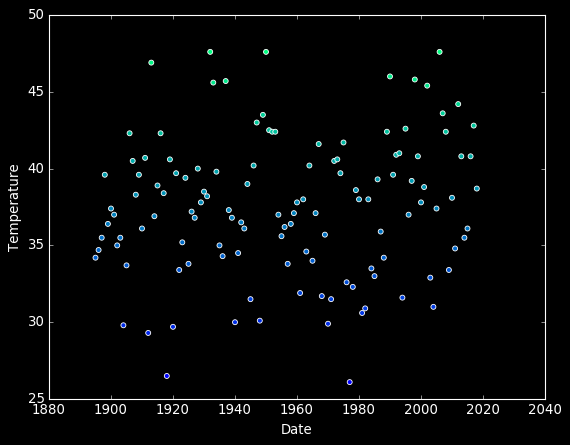

In [59]:
axes = sns.scatterplot(data=df_nyc, x='Date', y='Temperature',
     hue='Temperature', palette='winter', legend=False)

# hue='Temperature' use the Temprature values to color the graph
#(higher and lower tempratures have different colors)

### Now we want to add the regressor line and change the y axis limits

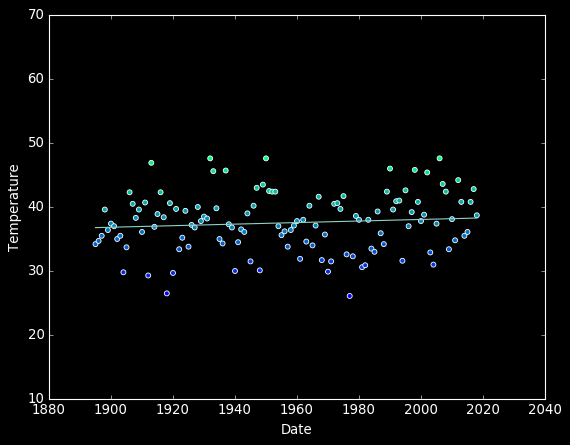

In [60]:
axes = sns.scatterplot(data=df_nyc, x='Date', y='Temperature',
     hue='Temperature', palette='winter', legend=False)

axes.set_ylim(10, 70)
#sets the limtit foe y axis

x = np.array([min(df_nyc.Date.values), max(df_nyc.Date.values)])
#Array of min and max date values

y = predict(x)
#Array f predicted temprature for min and max date values

import matplotlib.pyplot as plt 

line = plt.plot(x, y)
#Plot a line(regressor) based on the cordination(x,y) of the start and end of the line(
#(minimum date and maximum date)

### We even can extend the regressor line to new Dates

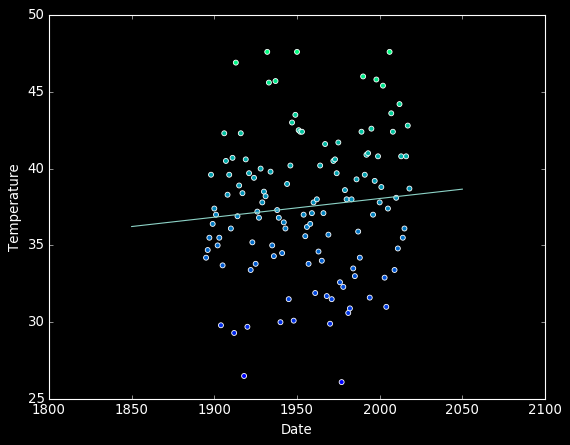

In [61]:
axes = sns.scatterplot(data=df_nyc, x='Date', y='Temperature',
     hue='Temperature', palette='winter', legend=False)

x = np.array([1850, 2050])
#Array of new values for Date: 1850 and 2060 are not in the dataset

y = predict(x)
#Array f predicted temprature for new Date values

import matplotlib.pyplot as plt 

line = plt.plot(x, y)
#Plot a line(regressor) based on the cordination(x,y) of the start and end of the line(


## Plotting with seaborn is easire

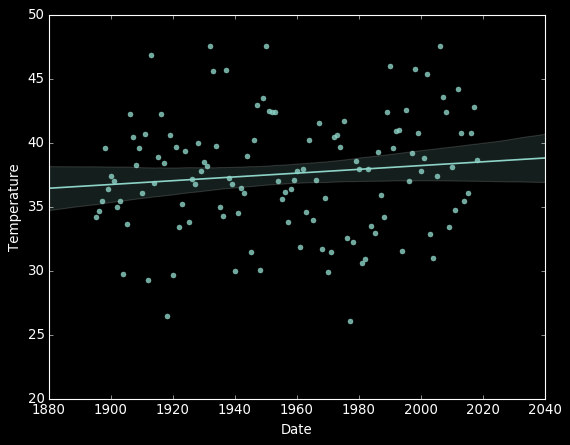

In [62]:
sns.regplot(x="Date", y="Temperature", data=df_nyc);

## **Multiple Linear Regression** 
-  California Housing Dataset

In [63]:
from sklearn.datasets import fetch_california_housing

In [64]:
california = fetch_california_housing()

#California is a bunch itam something like a dictionary

In [65]:
california

{'data': array([[   8.3252    ,   41.        ,    6.98412698, ...,    2.55555556,
           37.88      , -122.23      ],
        [   8.3014    ,   21.        ,    6.23813708, ...,    2.10984183,
           37.86      , -122.22      ],
        [   7.2574    ,   52.        ,    8.28813559, ...,    2.80225989,
           37.85      , -122.24      ],
        ...,
        [   1.7       ,   17.        ,    5.20554273, ...,    2.3256351 ,
           39.43      , -121.22      ],
        [   1.8672    ,   18.        ,    5.32951289, ...,    2.12320917,
           39.43      , -121.32      ],
        [   2.3886    ,   16.        ,    5.25471698, ...,    2.61698113,
           39.37      , -121.24      ]]),
 'target': array([4.526, 3.585, 3.521, ..., 0.923, 0.847, 0.894]),
 'feature_names': ['MedInc',
  'HouseAge',
  'AveRooms',
  'AveBedrms',
  'Population',
  'AveOccup',
  'Latitude',
  'Longitude'],
 'DESCR': '.. _california_housing_dataset:\n\nCalifornia Housing dataset\n--------------------

In [66]:
print(california.DESCR)

.. _california_housing_dataset:

California Housing dataset
--------------------------

**Data Set Characteristics:**

    :Number of Instances: 20640

    :Number of Attributes: 8 numeric, predictive attributes and the target

    :Attribute Information:
        - MedInc        median income in block
        - HouseAge      median house age in block
        - AveRooms      average number of rooms
        - AveBedrms     average number of bedrooms
        - Population    block population
        - AveOccup      average house occupancy
        - Latitude      house block latitude
        - Longitude     house block longitude

    :Missing Attribute Values: None

This dataset was obtained from the StatLib repository.
http://lib.stat.cmu.edu/datasets/

The target variable is the median house value for California districts.

This dataset was derived from the 1990 U.S. census, using one row per census
block group. A block group is the smallest geographical unit for which the U.S.
Census Bur

In [67]:
california.feature_names

['MedInc',
 'HouseAge',
 'AveRooms',
 'AveBedrms',
 'Population',
 'AveOccup',
 'Latitude',
 'Longitude']

In [68]:
california.data.shape

#Features(Independent variables)

(20640, 8)

In [69]:
california.target.shape

#Traget column (Dependent variable)

(20640,)

### This data set has 20640 rows, and 8 independent features and the target column which is median house value for California districts

In [70]:
pd.set_option('max_columns', 9)

In [71]:
california_df = pd.DataFrame(california.data, columns=california.feature_names)
california_df

#Converting the 8 feature columns inti a dataframe

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25
...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32


In [72]:
california_df.insert(0, 'MedHouseValue', pd.Series(california.target))
california_df

#Now we add the target column as 'MedHouseValue' to our dataframe as the first column

,MedHouseValue,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,4.526,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,3.585,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,3.521,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,3.413,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.422,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25
...,...,...,...,...,...,...,...,...,...
20635,0.781,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09
20636,0.771,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21
20637,0.923,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22
20638,0.847,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32


#### To save a dataframe

    california_df.to_csv(r"C:\Users\Behnam\Downloads\Python\Datasets\California_Housing.csv", index = False)

This line works as well but add the target column to the end of dataframe    

    california_df['MedHouseValue'] = pd.Series(california.target)

In [73]:
california_df.describe()

,MedHouseValue,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,2.068558,3.870671,28.639486,5.429000,1.096675,1425.476744,3.070655,35.631861,-119.569704
std,1.153956,1.899822,12.585558,2.474173,0.473911,1132.462122,10.386050,2.135952,2.003532
min,0.149990,0.499900,1.000000,0.846154,0.333333,3.000000,0.692308,32.540000,-124.350000
25%,1.196000,2.563400,18.000000,4.440716,1.006079,787.000000,2.429741,33.930000,-121.800000
50%,1.797000,3.534800,29.000000,5.229129,1.048780,1166.000000,2.818116,34.260000,-118.490000
75%,2.647250,4.743250,37.000000,6.052381,1.099526,1725.000000,3.282261,37.710000,-118.010000
max,5.000010,15.000100,52.000000,141.909091,34.066667,35682.000000,1243.333333,41.950000,-114.310000


In [74]:
sample_df = california_df.sample(frac=0.1, random_state=17)
sample_df

#This gives use a sub sample of the datafarem, frac=0.1 means 10 percent of the data

,MedHouseValue,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
18403,2.38800,5.4741,24.0,6.587799,1.060181,4017.0,3.311624,37.24,-121.84
13405,1.08800,1.9583,7.0,5.362805,1.442073,1064.0,3.243902,34.10,-117.46
9539,0.72700,2.6058,40.0,3.885714,0.914286,785.0,4.485714,37.39,-120.71
8668,5.00001,4.5817,30.0,4.146135,1.108696,1526.0,1.842995,33.82,-118.39
9019,3.99200,8.0137,9.0,7.734673,1.041211,12873.0,3.274739,34.16,-118.78
...,...,...,...,...,...,...,...,...,...
19279,1.46000,1.9458,26.0,4.709677,1.020161,937.0,3.778226,38.42,-122.72
12378,0.55000,1.3801,25.0,4.737500,1.725000,604.0,2.516667,33.78,-116.46
16068,3.20200,3.7361,48.0,5.754617,1.105541,1041.0,2.746702,37.75,-122.49
16563,2.74200,5.0176,19.0,6.061538,0.956410,1264.0,3.241026,37.77,-121.48


## Visualizing the Features

Relation between each feature and the target

In [75]:
sample_df

,MedHouseValue,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
18403,2.38800,5.4741,24.0,6.587799,1.060181,4017.0,3.311624,37.24,-121.84
13405,1.08800,1.9583,7.0,5.362805,1.442073,1064.0,3.243902,34.10,-117.46
9539,0.72700,2.6058,40.0,3.885714,0.914286,785.0,4.485714,37.39,-120.71
8668,5.00001,4.5817,30.0,4.146135,1.108696,1526.0,1.842995,33.82,-118.39
9019,3.99200,8.0137,9.0,7.734673,1.041211,12873.0,3.274739,34.16,-118.78
...,...,...,...,...,...,...,...,...,...
19279,1.46000,1.9458,26.0,4.709677,1.020161,937.0,3.778226,38.42,-122.72
12378,0.55000,1.3801,25.0,4.737500,1.725000,604.0,2.516667,33.78,-116.46
16068,3.20200,3.7361,48.0,5.754617,1.105541,1041.0,2.746702,37.75,-122.49
16563,2.74200,5.0176,19.0,6.061538,0.956410,1264.0,3.241026,37.77,-121.48


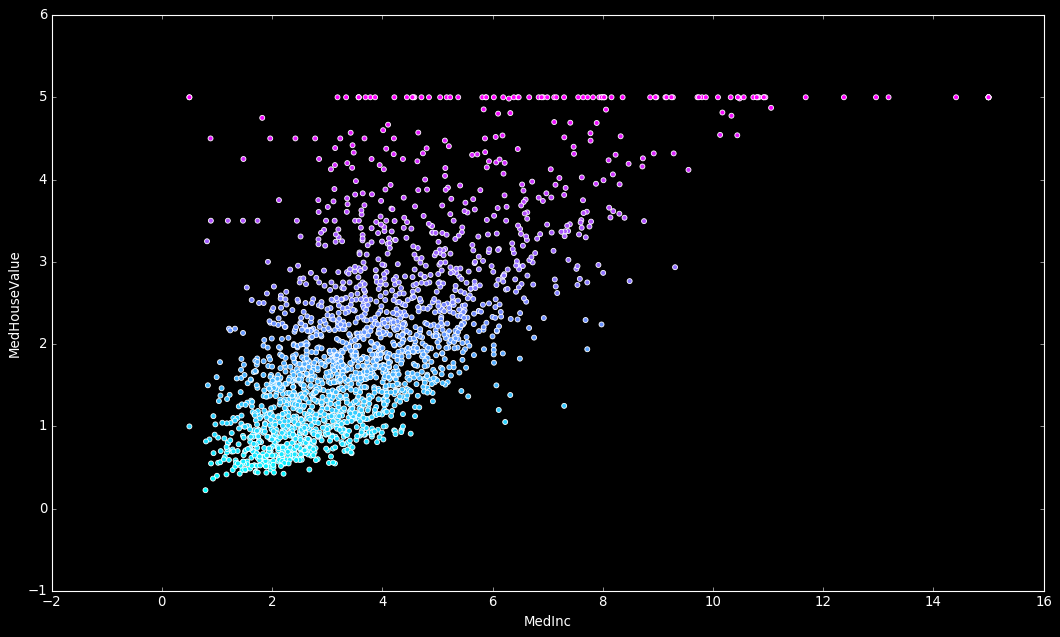

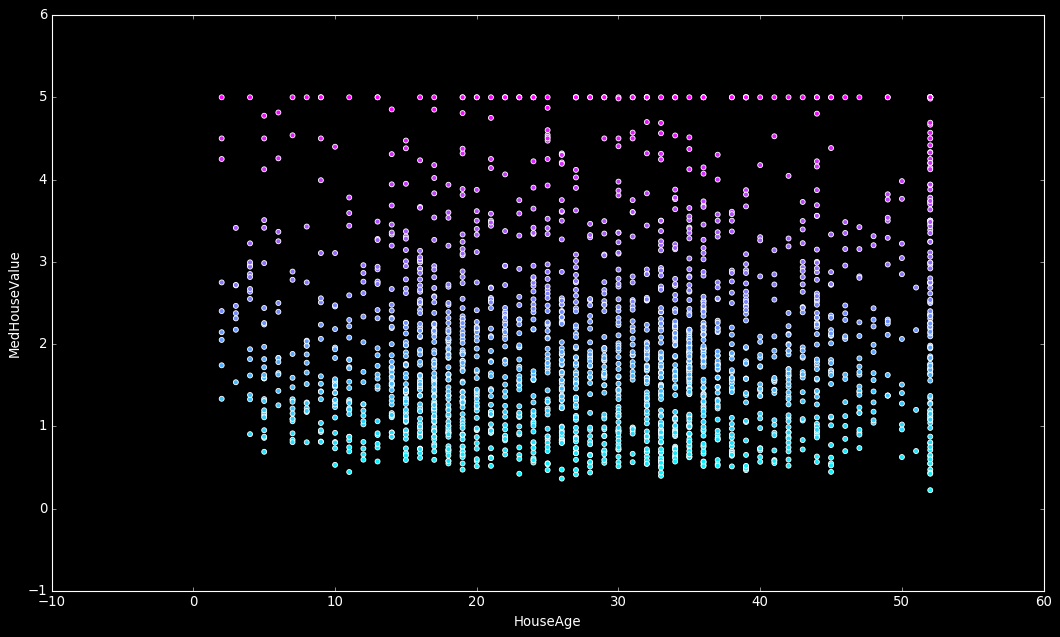

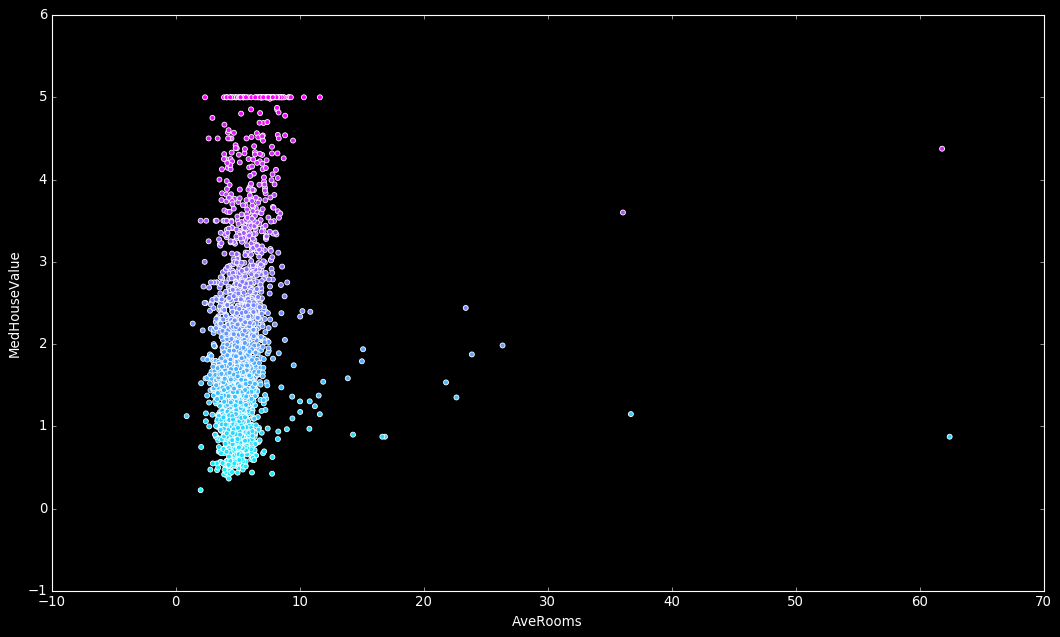

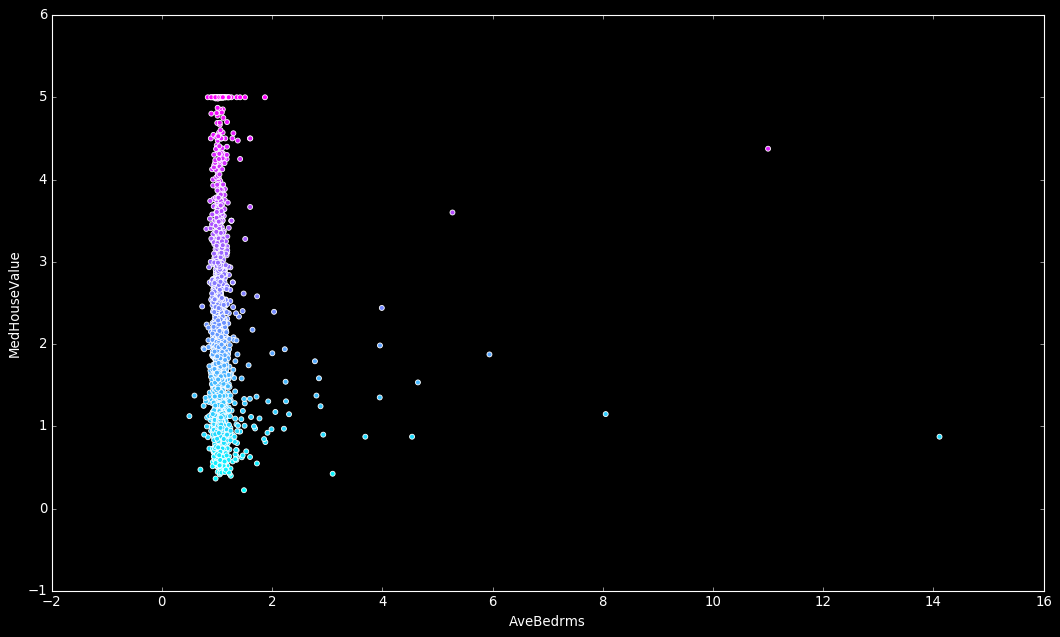

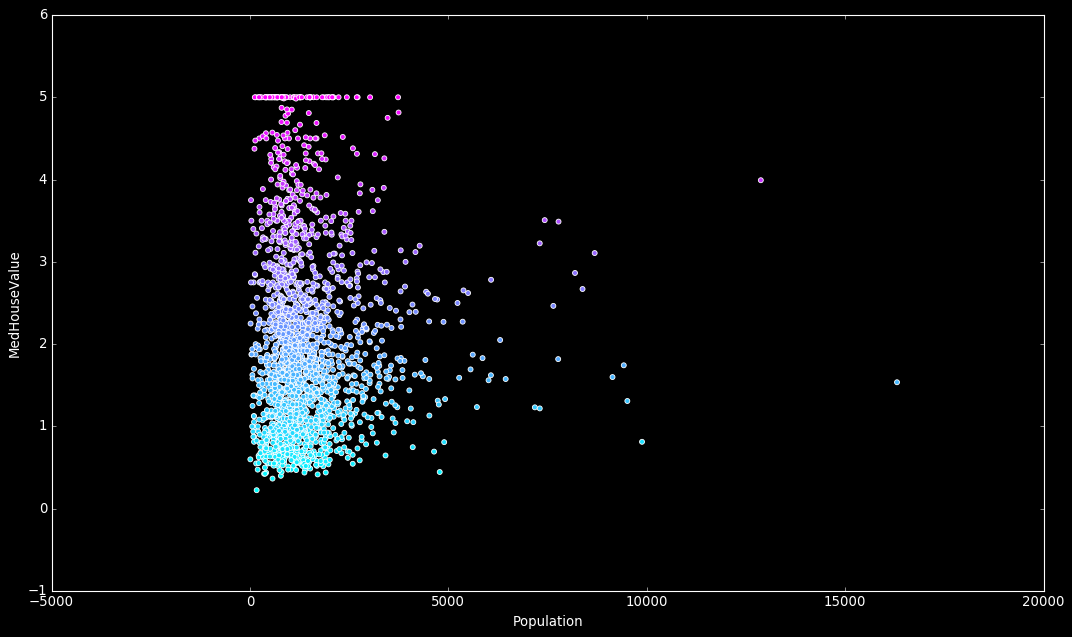

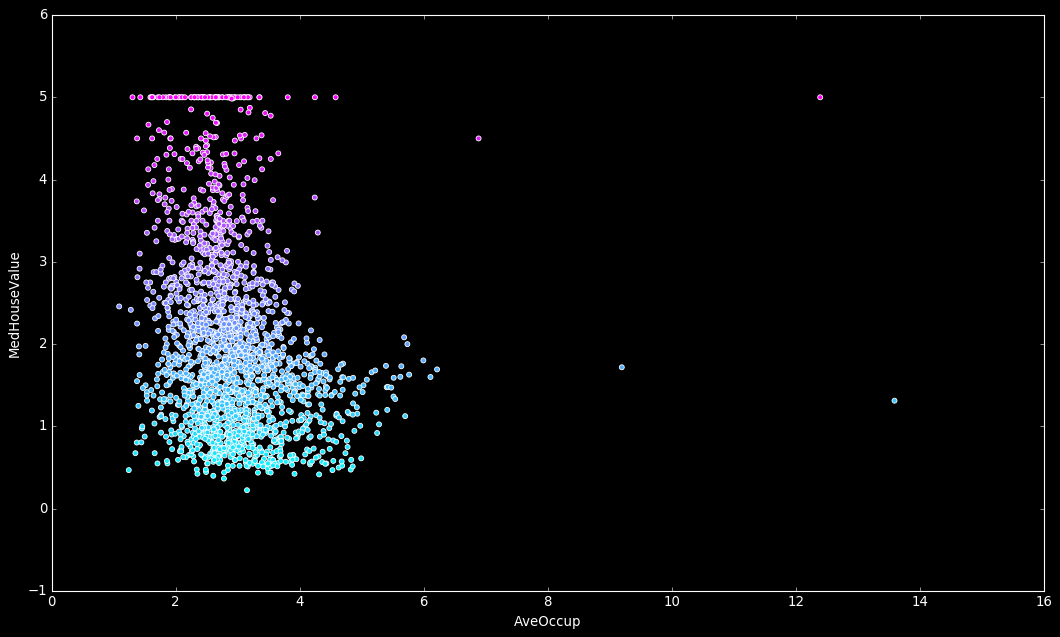

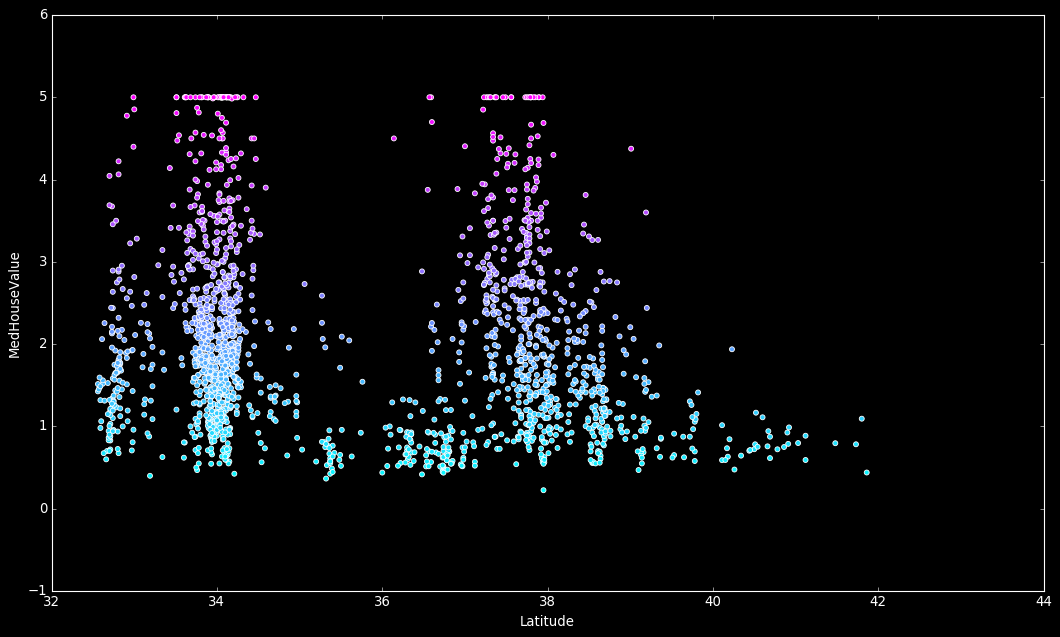

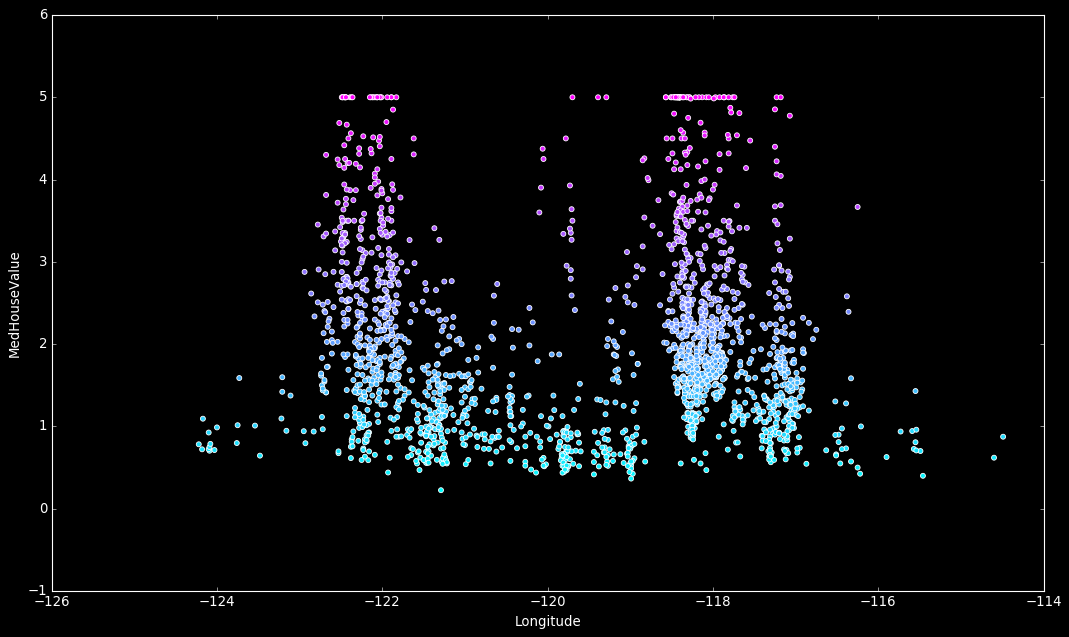

In [76]:
for feature in sample_df.columns[1:]:
     plt.figure(figsize=(16, 9))
     sns.scatterplot(data=sample_df, x=feature, 
                     y='MedHouseValue', hue='MedHouseValue', 
                     palette='cool', legend=False)

In [77]:
california_df

,MedHouseValue,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,4.526,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,3.585,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,3.521,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,3.413,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.422,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25
...,...,...,...,...,...,...,...,...,...
20635,0.781,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09
20636,0.771,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21
20637,0.923,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22
20638,0.847,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32


In [78]:
target = 'MedHouseValue'
predictors = california_df.columns[1:]

In [79]:
y= california_df[target]
X = california_df[predictors]

In [80]:
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size = 0.3, random_state=5)

In [81]:
lr = linear_model.LinearRegression().fit(X_train, y_train)

### To print the coefficient of each column: 

In [82]:
pd.Series({X.columns[i] : lr.coef_[i] for i in range(0,len(X.columns))} )

MedInc        0.439604
HouseAge      0.008774
AveRooms     -0.114294
AveBedrms     0.688625
Population   -0.000005
AveOccup     -0.003917
Latitude     -0.423578
Longitude    -0.439013
dtype: float64

In [83]:
for i, name in enumerate(california_df.columns[1:]):
     print(f'{name:>10}: {lr.coef_[i]}')

    MedInc: 0.4396044212129328
  HouseAge: 0.008773707942583368
  AveRooms: -0.11429369636176377
 AveBedrms: 0.6886253085693742
Population: -5.253853381286415e-06
  AveOccup: -0.003916624279969501
  Latitude: -0.4235780895796338
 Longitude: -0.439013084071467


## Testing the Model

In [84]:
predicted = lr.predict(X_test)
len(predicted)

6192

In [85]:
expected = y_test
len(expected)

6192

In [86]:
print(f"Training set score: {lr.score(X_train, y_train):.2f}")
print(f"Test set score: {lr.score(X_train, y_train):.2f}")

Training set score: 0.60
Test set score: 0.60


## Visualizing the Expected vs. Predicted Prices

In [87]:
df = pd.DataFrame()
#First create a new dataframe

df['Expected'] = expected
df['Predicted'] = predicted
#Then add predicted and expected values to this dataframe

df

,Expected,Predicted
14772,0.936,1.699477
10105,1.536,1.943338
20094,1.325,0.979243
19261,1.479,1.731252
14139,1.207,1.753651
...,...,...
15291,1.688,2.413636
1595,4.065,3.424875
8755,3.788,2.613949
1294,1.681,1.856687


In [88]:
plt.style.use('dark_background')

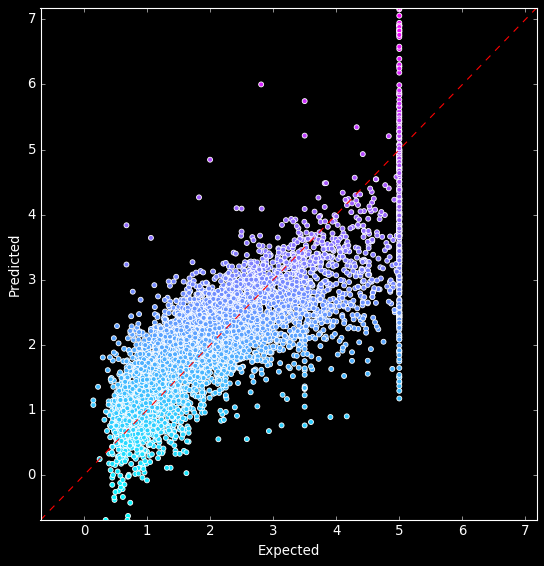

In [89]:
figure = plt.figure(figsize=(8, 8))
#size of the plot

axes = sns.scatterplot(data=df, x='Expected', y='Predicted', 
     hue='Predicted', palette='cool', legend=False)

start = min(expected.min(), predicted.min())

end = max(expected.max(), predicted.max())

axes.set_xlim(start, end)

axes.set_ylim(start, end)

line = plt.plot([start, end], [start, end], 'r--')
#Line of prefect prediction(not the regressor line)
#r-- sets the color and style of the line

## Regression Model Metrics

In [90]:
print("Training set score: {:.2f}".format(lr.score(X_train, y_train)))
print("Test set score: {:.2f}".format(lr.score(X_test, y_test)))

Training set score: 0.60
Test set score: 0.61


In [91]:
from sklearn import metrics

    expected = y_test
    predicted = y_pred = lr.predict(X_test)

In [92]:
lr.score(X_test, y_test)

0.6105643389565667

## **R2 Score**

$$R^2 = 1- \frac{\sum_{i=0}^k {(y_t - y_p) ^ 2}}{\sum_{i=0}^k {(y_t - \overline y_t )^ 2}}$$

$k:$ number of columns(features)

$y_t$ = actual value

$y_p$: predicted value

$ \overline y_t:$ average of $y_t$ values

>The best possible score is 1.0

In [93]:
metrics.r2_score(expected, predicted)

0.6105643389565667

 >These 2 methods are the same

## **Mean Square Error**
  
    
$$MSE = \sum_{i=0}^k {(y_t - y_p) ^ 2}$$

$k:$ number of columns(features)

$y_t$ = actual value

$y_p$: predicted value
    
>The best possible MSE is 0

In [94]:
metrics.mean_squared_error(expected, predicted)

0.530861594105415

## Choosing the Best Model

>Cross Validation for multiple models

In [95]:
from sklearn.linear_model import ElasticNet, Lasso, Ridge

In [96]:
from sklearn.linear_model import LinearRegression

estimators = { 
    #These models are newly created but we could use our previously made models (names without () )
    'LinearRegression': LinearRegression(), #We could use lr here, the mdoel we already created
    'ElasticNet': ElasticNet(alpha=0.1, max_iter=100000, l1_ratio = 0.1),
    'Lasso': Lasso(),
    'Ridge': Ridge()
}

#Dictioanry of different regressors

In [97]:
from sklearn.model_selection import KFold, cross_val_score

### $R^2 error$

In [98]:
for estimator_name, estimator_object in estimators.items():
     kfold = KFold(n_splits=10, random_state=11, shuffle=True)
     scores = cross_val_score(estimator=estimator_object, 
         X=california.data, y=california.target, cv=kfold,
         scoring='r2')
     print(f'{estimator_name:>16}: ' + 
           f'mean of r2 scores={scores.mean():.2f}')

LinearRegression: mean of r2 scores=0.60
      ElasticNet: mean of r2 scores=0.59
           Lasso: mean of r2 scores=0.28
           Ridge: mean of r2 scores=0.60


### $MSE$ (mean square error)

In [99]:
for estimator_name, estimator_object in estimators.items():
     kfold = KFold(n_splits=10, random_state=11, shuffle=True)
     scores = cross_val_score(estimator=estimator_object, 
         X=california.data, y=california.target, cv=kfold,
         scoring='neg_mean_squared_error')
     print(f'{estimator_name:>16}: ' + 
           f'mean of mean square error scores={scores.mean():.3f}')

LinearRegression: mean of mean square error scores=-0.533
      ElasticNet: mean of mean square error scores=-0.552
           Lasso: mean of mean square error scores=-0.952
           Ridge: mean of mean square error scores=-0.533


### Cross Validation for single model

In [100]:
import sklearn as sk
nfolds = 3
kf = KFold(n_splits=nfolds,random_state=5,shuffle=True)
avgCV_r2 = sk.model_selection.cross_val_score(Ridge(0.007), X_train, y_train,\
                                              cv=kf,n_jobs=-1, scoring='r2').mean()
avgCV_r2

0.6009955959767983

### Tuning the Ridge model

In [101]:
ridge = Ridge(alpha=100).fit(X_train, y_train) 

print(f"Test data score Ridge: {ridge.score(X_test, y_test): f}" )

Test data score Ridge:  0.611150


### Tuning the Lasso model

In [102]:
lasso = Lasso(alpha = 0.001).fit(X_train, y_train)

print(f"Test data score Lasso: {lasso.score(X_test, y_test):f}" )

Test data score Lasso: 0.610822


### Plotting the features importance

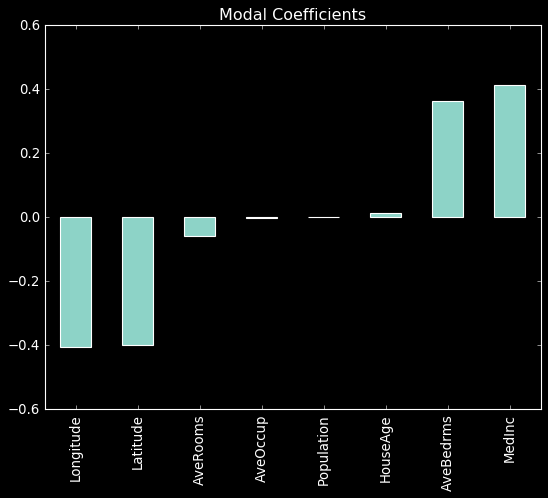

In [103]:
from pandas import Series, DataFrame

ridge.fit(X_test, y_test)
coef = Series(ridge.coef_,predictors).sort_values()
coef.plot(kind='bar', title='Modal Coefficients')

#    **Normalizing Independent Features**

### To goal is to Scale the idependent features( $X$ values)

In [104]:
X

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25
...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32


In [105]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size = 0.3, random_state=5)

### The correct approach is to fit() only the test dataset to get the mean and standard deviation from the test set and then apply transform() on both sets.

- It means that we don't include training set to find mean and std because in real life situations, we don't have test data when we create a model.

In [106]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler() #learns the mean and std for each column of train data only


In [107]:
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
X_train_scaled
#Create a dataframe of train X values


array([[ 0.40534876, -0.92142979,  0.70391347, ..., -0.02818932,
         0.65232597, -1.19423938],
       [-0.52414074,  0.74592773,  0.16791961, ..., -0.04498606,
         0.33440449, -0.04125972],
       [-0.2932854 , -0.76263383, -0.11421102, ..., -0.01937762,
        -0.06299736, -0.54537637],
       ...,
       [ 1.03590269, -0.68323586,  1.05162208, ...,  0.06124682,
        -0.63806121,  0.40795313],
       [-0.14328532, -1.15962372, -0.1622565 , ..., -0.04916613,
         0.6336247 , -1.20422189],
       [ 0.25801014, -1.5566136 ,  0.14116539, ..., -0.09954862,
        -0.12845178,  0.25322426]])

from sklearn.preprocessing import StandardScaler

X_scaled = StandardScaler().fit_transform(X)
X_scaled = pd.DataFrame(X_scaled, columns = X.columns)
X_scaled

### Mean of all columns in X

In [108]:
scaler.mean_

array([   3.86348521,   28.60520487,    5.42445414,    1.09752766,
       1431.11233389,    3.09119233,   35.6347446 , -119.56733596])

### Variance of all columns in X

In [109]:
scaler.var_

array([      3.52938462,     158.62846682,       6.79572983,
             0.24868728, 1218041.06926094,     136.23922576,
             4.57486296,       4.01403051])

### To get Standard Deviation:


In [110]:
std = scaler.var_**(0.5)
std

array([   1.87866565,   12.59477935,    2.60686207,    0.49868555,
       1103.64897919,   11.672156  ,    2.13889293,    2.00350456])

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y,test_size = 0.3, stratify = y, random_state=5)
#Now we have X_train_s, X_test_s

## Regardless of the approach we choose, the rest of the process is the same

In [111]:
lr = linear_model.LinearRegression().fit(X_train, y_train)
pd.Series({X.columns[i] : lr.coef_[i] for i in range(0,len(X.columns))} )

#Linear Model for scaled X and coefficients of each column

MedInc        0.439604
HouseAge      0.008774
AveRooms     -0.114294
AveBedrms     0.688625
Population   -0.000005
AveOccup     -0.003917
Latitude     -0.423578
Longitude    -0.439013
dtype: float64

In [112]:
y_pred = lr.predict(X_test)
y_pred

array([1.69947695, 1.94333752, 0.97924289, ..., 2.61394913, 1.85668711,
       2.27733216])

### Notice that Feature Scaling:
>doesn't change the predicted results ($y_p$) 

>But changes the coefficients ($w$)

# **Gradient Descent** 

https://github.com/chasinginfinity/ml-from-scratch/blob/master/02%20Linear%20Regression%20using%20Gradient%20Descent/Linear%20Regression%20using%20Gradient%20Descent.ipynb

### Gradient Descent is about minimizing the Loss function

 A simple example to plot the Loss fucntion for Linear Regression

In [113]:
X_prime = np.array([2, 3, 1, 0])
y_prime = np.array([9, 14, 7, 5])

In [114]:
np.arange(0.0, 6.0, 0.1)
#Different values for Slope

array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. , 1.1, 1.2,
       1.3, 1.4, 1.5, 1.6, 1.7, 1.8, 1.9, 2. , 2.1, 2.2, 2.3, 2.4, 2.5,
       2.6, 2.7, 2.8, 2.9, 3. , 3.1, 3.2, 3.3, 3.4, 3.5, 3.6, 3.7, 3.8,
       3.9, 4. , 4.1, 4.2, 4.3, 4.4, 4.5, 4.6, 4.7, 4.8, 4.9, 5. , 5.1,
       5.2, 5.3, 5.4, 5.5, 5.6, 5.7, 5.8, 5.9])

In [115]:
loss_list = [] #This list contains all Loss values for different slopes
m_list =  np.arange(0.0, 6.0, 0.1) #An array of different slopes
b_prime = 5 #Fixed intercept

for i in m_list:
    m_prime = round(i, 1) #Slope
    y_pred_prime = m_prime*X_prime + b_prime
    loss = sum( (y_prime - y_pred_prime)**2 ) #Loss values for each slope
    loss_list.append(loss)
 

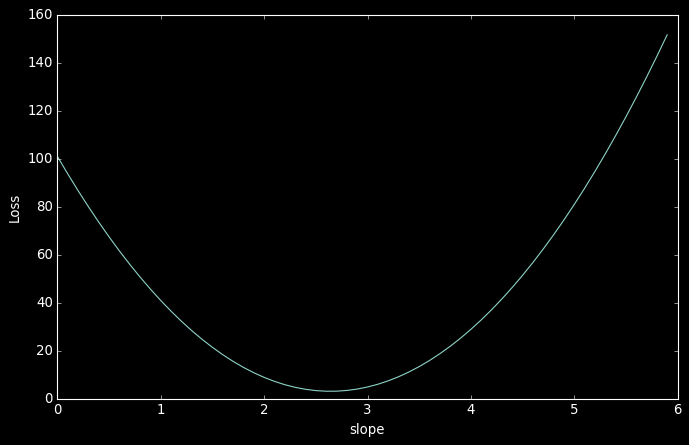

In [116]:
from matplotlib.pyplot import figure
figure(num=None, figsize=(10, 6), dpi=80,)
plt.plot(m_list, loss_list )
plt.xlabel('slope')
plt.ylabel('Loss')
plt.show()

### As you can see, the Loss function for Linear Regression is a convex.

>It means that Loss fucntion of a  Linear Regression has only one minima

## **Finding  Slope and Intercept using Gradient Descent**

This example works only for Single Linear Regression

In [117]:
california_df

,MedHouseValue,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,4.526,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,3.585,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,3.521,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,3.413,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.422,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25
...,...,...,...,...,...,...,...,...,...
20635,0.781,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09
20636,0.771,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21
20637,0.923,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22
20638,0.847,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32


In [118]:
california_df_single = california_df[['MedHouseValue', 'MedInc']]
#Using only one column as the dependent variable(x)

In [119]:
X = california_df_single.MedInc
y = california_df_single.MedHouseValue

### Defining a function to calculate Gradien Descent for Linear Regression

In [120]:
loss_list = []
m_list = []

loss
def linear_regression_gradient_descent(X, y, m_current=0, b_current=0, epochs=1000, learning_rate=0.001):
     N = float(len(y)) # N: Number of elements in y(rows)
     for i in range(epochs): #epochs: The number of iterations to perform gradient descent
          y_current = (m_current * X) + b_current 
          loss = sum((y-y_current)**2)/N
          loss_list.append(loss)
          m_list.append(m_current)
          m_gradient = -(2/N) * sum(X * (y - y_current))
          b_gradient = -(2/N) * sum(y - y_current)
          m_current = m_current - (learning_rate * m_gradient)
          b_current = b_current - (learning_rate * b_gradient)
     print(f"Slope is: {m_current}\nInterceprt is: {b_current}\nLoss is: {loss}")
     return (m_current, b_current) 
     #return

In [121]:
m, b = linear_regression_gradient_descent(X, y)

Slope is: 0.46832724481210447
Interceprt is: 0.21125447583768947
Loss is: 0.7122890325631209


### Plotting the data points and the regressor line calculated from Gradient Descent

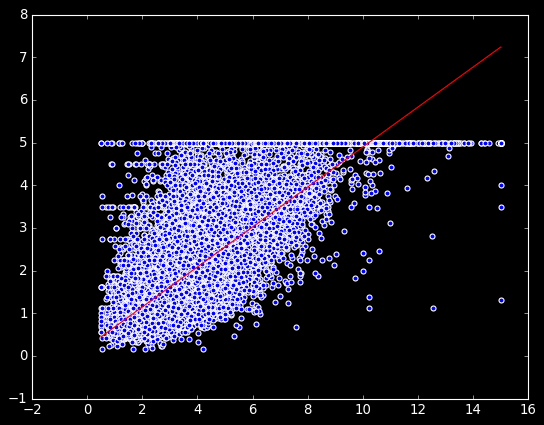

In [122]:
# Making predictions
Y_pred = m*X + b

plt.scatter(X, y)
plt.plot([min(X), max(X)], [min(Y_pred), max(Y_pred)], color='red') # predicted
plt.show()

### Plotting the Loss($L$) value againts Slope($m$)

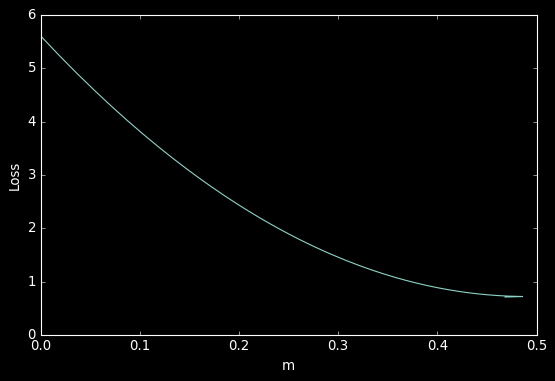

In [123]:
from matplotlib.pyplot import figure
figure(num=None, figsize=(8, 5), dpi=80,)
plt.plot(m_list, loss_list)
plt.xlabel('m')
plt.ylabel('Loss')
plt.show()

## Compare the Graddient Descent  with Ordinary Linear Regression

In [124]:
lr_single =  linear_model.LinearRegression().fit(X.values.reshape(-1, 1), y)

### Whenever we want to use a series as the X cloumn for a regression model, we have to convert it into a 2D array with values.reshape(-1, 1)

    X.values.reshape(-1, 1)

In [125]:
print("regOrdinary.coef_:", lr_single.coef_)
print("regOrdinary.intercept_:", lr_single.intercept_)

regOrdinary.coef_: [0.41793849]
regOrdinary.intercept_: 0.4508557670326785


In [126]:
y_pred_final = m*X + b
loss = y - y_pred_final
loss.mean()

0.044563006885928076

***